# What factors affect a country's local average annual temperature?

## Project 1

### Introduction

Climate change is a global phenomenon that is caused by an increase in the concentration of greenhouse gases (GHGs) in the atmosphere, primarily carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O), due to human activities such as burning fossil fuels, deforestation, and agriculture. The rise in global temperatures has significant impacts on ecosystems and human societies, including more frequent and severe weather events, sea level rise, and changes in precipitation patterns (Earth Science Communications Team). 

Studies have demonstrated that human activities are the primary driver of global warming, and that the increase in GHG emissions is strongly linked to the rise in global temperatures (Rosa and Dietz). However, the relationship between rising emissions and GDP of countries with average annual temperatures is complex and not well understood. Some researchers suggest that economic growth and emissions are positively correlated, and that higher emissions lead to higher temperatures (Knight and Schor). For example, countries such as China, whose GDP has been growing rapidly over the past few decades, are also growing in GHG emissions (Christopher L. Weber a et al.). This research paper seeks to explore the relationship between rising emissions and GDP of countries with their average annual temperatures, in order to provide insights into the potential impacts of economic growth on the Earth's climate system.

The dependent variable in this study is average annual temperature and the independent variables are GDP, development status, PM2.5 pollution and GHG emissions (broken down into Co2, Coal Co2, Cement Co2, Oil Co2, Gas Co2, Methane and Nitrous Oxide). 

Two datasets were combined to form the primary dataset in this study:  "Climate Change: Earth Surface Temperature Data" (Earth) and "Our World in Data CO2 and Greenhouse Gas Emissions database" (Ritchie et al.). The sample from the Earth Surface Temperature dataset includes several subsets, however, for the purpose of this study only the "Global Land Temperature By Country" data was used. The Earth Surface Temperature dataset includes the average monthly temperature for 243 countries from 1744-2013. The Our World in Data (OWID) sample contains data on annual Co2 (and Co2 broken down by contributions from cement, oil, gas and coal), methane and nitrous oxide emissions, as well as annual GDP by country from 1990-2018. 

Findings from the study include a weak positive correlation between average temperature with both GDP Co2 emissions and pollution.

### Data Cleaning/Loading

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
GLT_City_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\archive\\GlobalLandTemperaturesByCountry.csv"
Emmisions_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\data.csv"
P_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\pop.csv"

In [94]:
#GLT -> Global Land Temperature dataset from Kaggle
#E -> Emmissons dataset from OWID
GLT = pd.read_csv(GLT_City_URL).drop(labels = 'AverageTemperatureUncertainty', axis = 1)
E = pd.read_csv(Emmisions_URL)
P = pd.read_csv(P_URL).rename(columns = {'country':'Country','year':'Year','population':'Population'})

**Combing the datasets:** To combine these two data sets, several operations must be performed: 

Missing values need to be dropped, column titles must use the same naming convention to be merged, and the final dataset should contain only matching data from shared time-frames.

In [95]:
#Fixiing column names and dropping missing values
E.rename(columns = {'country':'Country', 'year':'Year'}, inplace = True)
GLT.rename(columns = {'dt':'Year'}, inplace = True)
GLT = GLT.dropna() 
#Generalize monthly inputs by year for merging
GLT['Year'] = GLT['Year'].str[0:4].astype(int)

In [96]:
#Merging data
data = E.merge(GLT, on=['Country','Year'])
index_names = data[data['Country'] == 'United Arab Emirates'].index
data.drop(index_names, inplace = True)

In [97]:
data_annual = data.drop(labels = 'AverageTemperature', axis = 1).drop_duplicates()
#cy -> country year
cy = data_annual[['Country','Year']]
def average(lst):
    return sum(lst)/len(lst)
#dcy -> Data, Country, Years
dcy = data.groupby(['Country','Year'])
#cyt -> country year temperature
avg = []
for country in cy['Country'].unique():
    for year in cy['Year'].unique():
        avg.append(average(dcy.get_group((country, year))['AverageTemperature']))
data_annual['Avg_Annual_Temp'] = avg

In [98]:
glt_annual =  GLT.copy().dropna()
#gltcy -> country year
gltcy = glt_annual[['Country','Year']]
def average(lst):
    return sum(lst)/len(lst)
#dcy -> Data, Country, Years
gcy = GLT.groupby(['Country','Year'])
#cyt -> country year temperature
avg1 = []
for country in gltcy['Country'].unique():
    for year in gltcy['Year'].unique():
        if (country, year) in gcy.groups:
            avg1.append(average(gcy.get_group((country, year))['AverageTemperature']))
        else:
            avg1.append(None)

In [99]:
yrs = []
countries = []
for country in gltcy['Country'].unique():
    for year in gltcy['Year'].unique():
        yrs.append(year)
        countries.append(country)
annual_temps = pd.DataFrame({'Year': yrs, 'Country': countries, 'Avg_Annual_Temp': avg1})

In [100]:
data_annual = data_annual.merge(P, on =['Country','Year'], how = 'left')

### Summary Statistics Tables

In [102]:
sum_stats = data_annual.drop(labels = 'Year', axis = 1).describe()
sum_stats.rename(columns = {'gdp':'GDP', 'cement_co2': 'Co2 from Cement', 
                            'coal_co2': 'Co2 from Coal', 'gas_co2': 'Co2 from Gas',
                           'methane': 'Methane', 'nitrous_oxide': 'Nitrous Oxide',
                           'oil_co2': 'Co2 from Oil', 'Avg_Annual_Temp': 'Average Annual Temperature',
                           'co2': 'Carbon Dioxide'}, inplace = True)
sum_stats

,GDP,Co2 from Cement,Carbon Dioxide,Co2 from Coal,Co2 from Gas,Methane,Nitrous Oxide,Co2 from Oil,Average Annual Temperature,Population
count,3.600000e+03,3510.000000,3600.000000,3599.000000,3599.00000,3600.000000,3600.000000,3599.000000,3600.000000,3.600000e+03
mean,4.329554e+11,5.828972,174.307535,70.052890,32.51188,46.027850,16.523408,62.548410,18.661510,4.023621e+07
std,1.401735e+12,34.462331,686.165587,397.784658,120.09953,117.744049,44.425038,217.379003,8.707836,1.398990e+08
min,2.757300e+08,0.000000,0.000000,0.000000,0.00000,0.040000,0.000000,0.059000,-19.000417,6.817100e+04
25%,1.638855e+10,0.113000,2.837750,0.000000,0.00000,4.177500,1.440000,1.889000,11.235104,3.774505e+06
50%,5.156510e+10,0.618000,17.193000,0.451000,1.71400,11.215000,4.715000,8.849000,21.666500,9.368752e+06
75%,2.632500e+11,2.766500,76.755000,14.101000,18.23750,35.542500,13.635000,36.433000,26.134833,2.613379e+07
max,1.610000e+13,748.323000,9956.309000,7493.454000,1410.36700,1147.210000,522.800000,2644.237000,30.744750,1.376100e+09


#### **Explanation:** Interpreting Summary Statistics

**Average Annual Temperature - Dependent Variable:** From this table we can observe the total range of average annual temperatures taken in every country in the dataset from 1990-2013. The lowest annual temperature in the dataset is -19 degrees Celsius and the highest is 30.7 degrees Celsius. The mean is 18.66 degrees Celsius. This particular snapshot of the data doesn't tell us too much as countries in Northern Europe are expected to have drastically different average temperatures from countries in Central Africa, for example. Furthermore, without the time trend, we cannot study how temperatures changed, whether they increased or decreased, and by how much.

**GDP - Independent Variable:** The summary statistics for GDP gives us a bit more information than Average Temperature. This is because we can observe the range of economic output of countries in our dataset in Real USD in 2011 dollars (see documentation for OWID dataset). The lowest recorded GDP is ~276 Million and the highest recorded GDP is ~16.1 Trillion. The mean level of GDP ~429 Million but standard deviation is ~1.4 Trillion so there is a high degree of variance in the sample.

**Emissions - Independent Variable:** For all emissions in the sample ata, the lowest recorded emission per country per year is approx 0, meaning that some countries in the sample emitted no greenhouse gasses in any form in a given year. The mean for each demonstrates the average annual emission of countries in this dataset between 1990-2013 in tons. We can observe from this table that Co2 takes the majority share of greenhouse gas emissions, and, amongst C02 emissions, coal is the highest contributor.

**Population - Independent Variable:** The population variable shows the total range of populations for countries included in these data. The minimum population for a country in a particular year is ~68,170 and the maximum population recorded is approximately 1.38B. This large range of populations will heavily impact per capita observations.

### Figures and Graphs

Of the set of 243 countries in the dataset, a subset of 6 representative countries were chosen for the figures below to make graphical interpretations more clear to the reader. The 6 countries cover a representative from North America, South America, Europe, Asia, South Asia and the Middle East and have a wide range of GDP and emissions data.

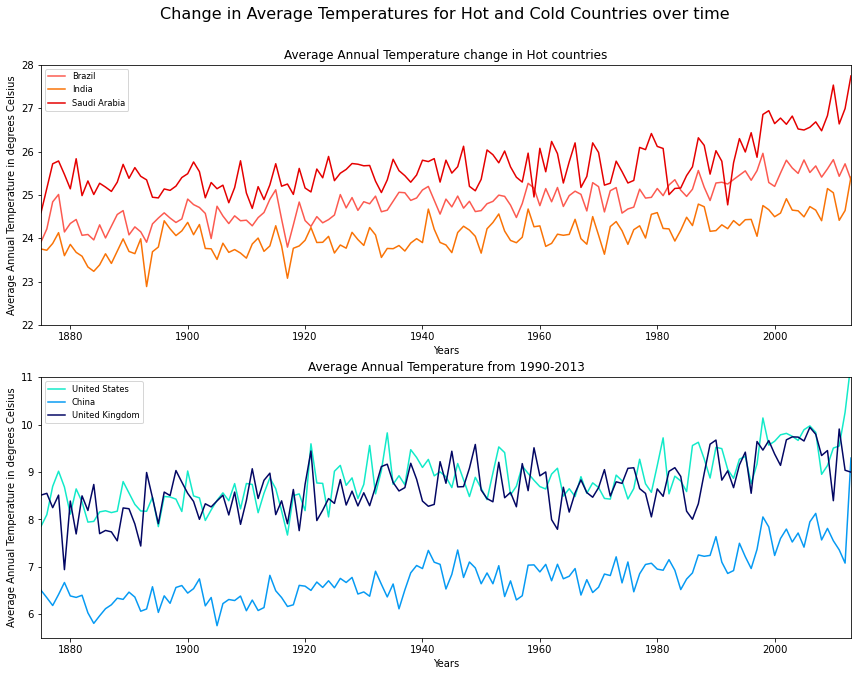

In [226]:
#Countries
figure, axis = plt.subplots(2)
C = ['United States', 'China', 'United Kingdom', 'Brazil', 'India', 'Saudi Arabia']
C1 = ['Brazil', 'India', 'Saudi Arabia']
C2 = ['United States', 'China', 'United Kingdom']
figure.suptitle("Change in Average Temperatures for Hot and Cold Countries over time",
                fontsize=16, x = '1.06', y = '2.2') 
hcolor = ['#FC5A50', '#F97306', '#E50000']
tick = 0
for country in C1:
    axis[0].plot(gltcy['Year'].unique(),annual_temps[annual_temps['Country'] == country]['Avg_Annual_Temp'], 
                 color = hcolor[tick], label = country)
    tick += 1
    
t = 0
ccolor = ['#12EAC9', '#069AF3', '#030764']
for country in C2:
    axis[1].plot(gltcy['Year'].unique(),annual_temps[annual_temps['Country'] == country]['Avg_Annual_Temp'], 
                 color = ccolor[t], label = country)
    t += 1
# set axis lables
axis[0].set_xlabel("Years")
axis[1].set_xlabel("Years")
axis[0].set_xlim(1875,2013)
axis[1].set_xlim(1875,2013)
axis[0].set_ylim(22,28)
axis[1].set_ylim(5.5,11)
axis[0].set_ylabel("Average Annual Temperature in degrees Celsius")
axis[1].set_ylabel("Average Annual Temperature in degrees Celsius")
axis[0].set_title('Average Annual Temperature change in Hot countries')
axis[1].set_title('Average Annual Temperature change in Cold countries')
# set chart title
plt.title("Average Annual Temperature from 1990-2013")
axis[0].legend(loc = 'best', fontsize = 'small')
axis[1].legend(loc = 'best', fontsize = 'small')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

The figure above shows how average annual temperatures in the 6 representative countries change over time. Countries in very different geographies have different average temperatures, so for the sake of clarity the 6 countries were further broken down into hot and cold countries. In this timeframe, we can observe a steady increase in average annual temperatures in all countries. In particular, the United States, Saudi Arabia and China increased average annual temperatures more rapidly than other countries in the last few years of data (since around 1990).

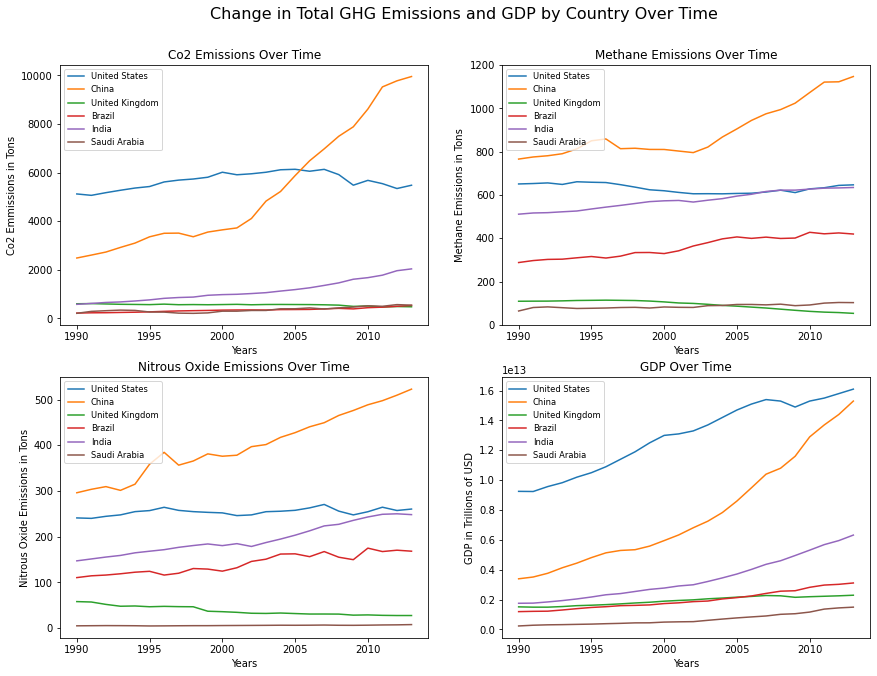

In [228]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Change in Total GHG Emissions and GDP by Country Over Time",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C:
    axis[0, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['co2'], label = country)
# For Methane
for country in C:
    axis[0, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['methane'], label = country) 
# For Nitrous Oxide
for country in C:
    axis[1, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['nitrous_oxide'], label = country)
# For GDP
for country in C:
    axis[1, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['gdp'], label = country)
axis[0, 0].set_title('Co2 Emissions Over Time')
axis[0, 1].set_title('Methane Emissions Over Time')
axis[1, 0].set_title('Nitrous Oxide Emissions Over Time')
axis[1, 1].set_title('GDP Over Time')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Years')
axis[0, 1].set_xlabel('Years')
axis[1, 0].set_xlabel('Years')
axis[1, 1].set_xlabel('Years')
axis[0, 0].set_ylabel('Co2 Emmissions in Tons')
axis[0, 1].set_ylabel('Methane Emissions in Tons')
axis[1, 0].set_ylabel('Nitrous Oxide Emissions in Tons')
axis[1, 1].set_ylabel('GDP in Trillions of USD')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

This figure shows the total GHG emissions and GDP change over 23 years starting in 1990 for 6 representative countries. China has increased their emissions the most of the countries in this sample and has also enjoyed a rapidly expanding economy. India's GDP has also been growing quickly alongside their GHG emissions. We can infer that the linkage between emissions and GDP is caused by increasing manufacturing output by increasing energy expenditure from coal, oil or gas and using cement for new factories.

The exception to this rule is the United States, whose GDP has been growing rapidly, but whose emissions remain steady during this period. This may be because "information technology is the casual factor behind the strong (economic) performance" (Jorgenson, Dale W., et al.) and not manufacturing output.


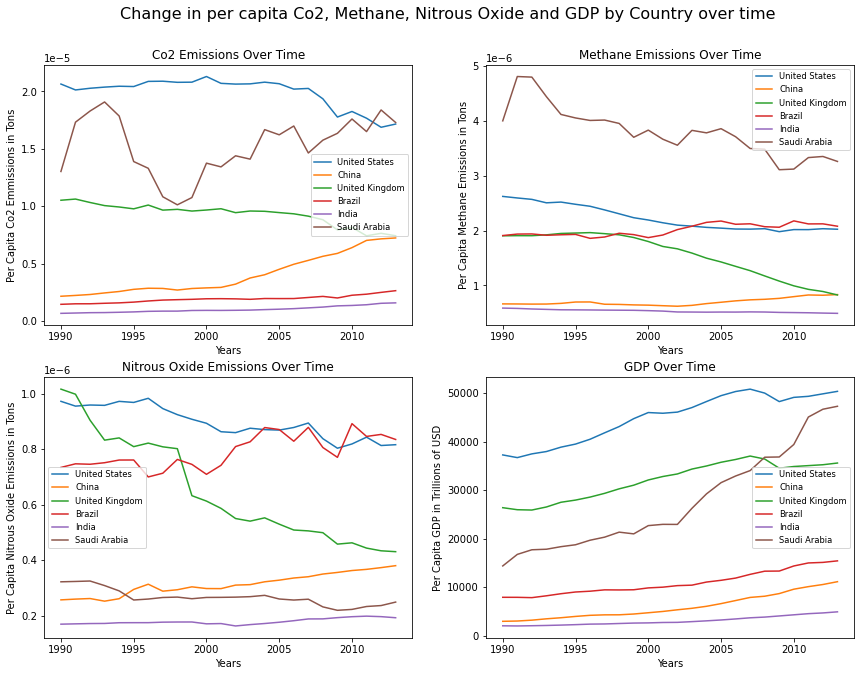

In [126]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Change in per capita Co2, Methane, Nitrous Oxide and GDP by Country over time",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C:
    axis[0, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['co2']/data_annual[data_annual['Country'] == country]['Population'], label = country)
# For Methane
for country in C:
    axis[0, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['methane']/data_annual[data_annual['Country'] == country]['Population'], label = country) 
# For Nitrous Oxide
for country in C:
    axis[1, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['nitrous_oxide']/data_annual[data_annual['Country'] == country]['Population'], label = country)
# For GDP
for country in C:
    axis[1, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['gdp']/data_annual[data_annual['Country'] == country]['Population'], label = country)
axis[0, 0].set_title('Co2 Emissions Over Time')
axis[0, 1].set_title('Methane Emissions Over Time')
axis[1, 0].set_title('Nitrous Oxide Emissions Over Time')
axis[1, 1].set_title('GDP Over Time')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Years')
axis[0, 1].set_xlabel('Years')
axis[1, 0].set_xlabel('Years')
axis[1, 1].set_xlabel('Years')
axis[0, 0].set_ylabel('Per Capita Co2 Emmissions in Tons')
axis[0, 1].set_ylabel('Per Capita Methane Emissions in Tons')
axis[1, 0].set_ylabel('Per Capita Nitrous Oxide Emissions in Tons')
axis[1, 1].set_ylabel('Per Capita GDP in Trillions of USD')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

These graphs show how per capita emissions and GDP change for each of the representative countries over the 23 years included in this dataset. Compared to the figure that reports total GHG emissions and GDP over time, this per capita analysis restricts the GHG emissions and GDP growth of China and India because of their huge populations. Comparatively, Saudi Arabia has high growth rates both Co2 emissions and GDP, while the United States and United Kingdom have managed to slightly decrease all emissions per capita while also growing in GDP per capita. China still has relatively high Co2 per capita growth compared to other countries, except for Saudi Arabia because of the large difference in their population.

From these data, it's possible to infer that countries whose GDP per capita grows may have higher emissions per capita, but in more developed countries like the United States and the United Kingdom, this effect is nullified. In the next figure, we will investigate which resources contribute the most to Co2 per capita emissions.


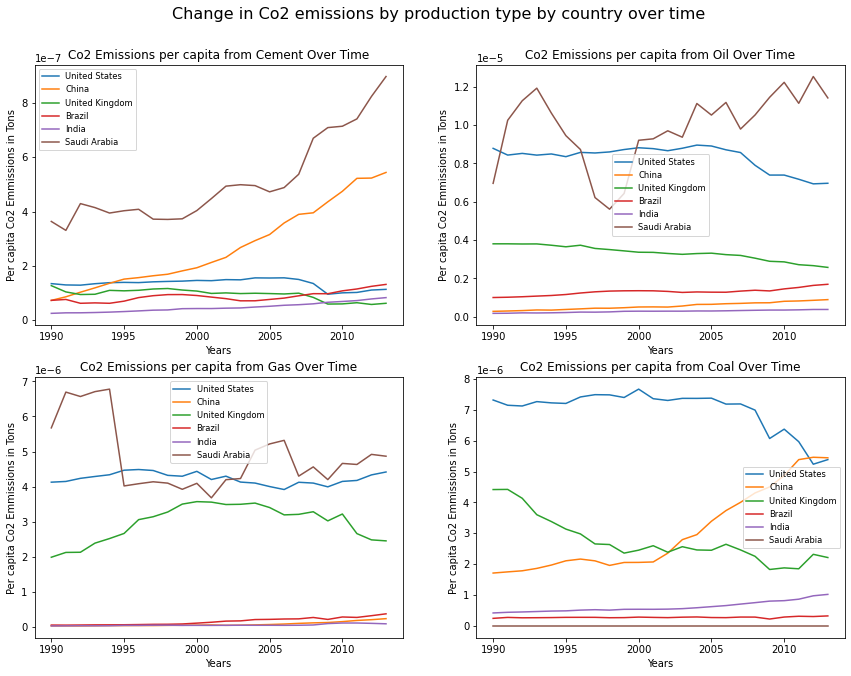

In [125]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Change in Co2 emissions by production type by country over time",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C:
    axis[0, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['cement_co2']/data_annual[data_annual['Country'] == country]['Population'], label = country)
# For Methane
for country in C:
    axis[0, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['oil_co2']/data_annual[data_annual['Country'] == country]['Population'], label = country) 
# For Nitrous Oxide
for country in C:
    axis[1, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['gas_co2']/data_annual[data_annual['Country'] == country]['Population'], label = country)
# For GDP
for country in C:
    axis[1, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['coal_co2']/data_annual[data_annual['Country'] == country]['Population'], label = country)
axis[0, 0].set_title('Co2 Emissions per capita from Cement Over Time')
axis[0, 1].set_title('Co2 Emissions per capita from Oil Over Time')
axis[1, 0].set_title('Co2 Emissions per capita from Gas Over Time')
axis[1, 1].set_title('Co2 Emissions per capita from Coal Over Time')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Years')
axis[0, 1].set_xlabel('Years')
axis[1, 0].set_xlabel('Years')
axis[1, 1].set_xlabel('Years')
axis[0, 0].set_ylabel('Per capita Co2 Emmissions in Tons')
axis[0, 1].set_ylabel('Per capita Co2 Emmissions in Tons')
axis[1, 0].set_ylabel('Per capita Co2 Emmissions in Tons')
axis[1, 1].set_ylabel('Per capita Co2 Emmissions in Tons')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

These graphs show how different countries use the different resources that contribute to overall Co2 emissions per capita, over time. The highest per capita emitters of Co2 from all resources are Saudi Arabia, China, and in the case of Oil and Gas, the United States and the United Kingdom.

If we compare the graph of Co2 emissions per capita derived from oil to the graph of total Co2 Emissions per capita, we can see that both graphs follow similar patterns. In fact, the plot of Saudi Arabia's total Co2 emissions per capita is almost identical to their Co2 emissions per capita from oil. This matches findings from OWID that states, "The world’s largest per capita Co2 emitters are the major oil producing countries" (Ritchie, 2019). Finally, the Co2 emissions derived from cement are high in Saudi Arabia and China. This make sense as both countries are rapidly industrializing and building new infrastructure. If cement is a key driver behind Co2 Emissions, we should expect countries that are quickly industrializing to have higher per capita Co2 emissions.


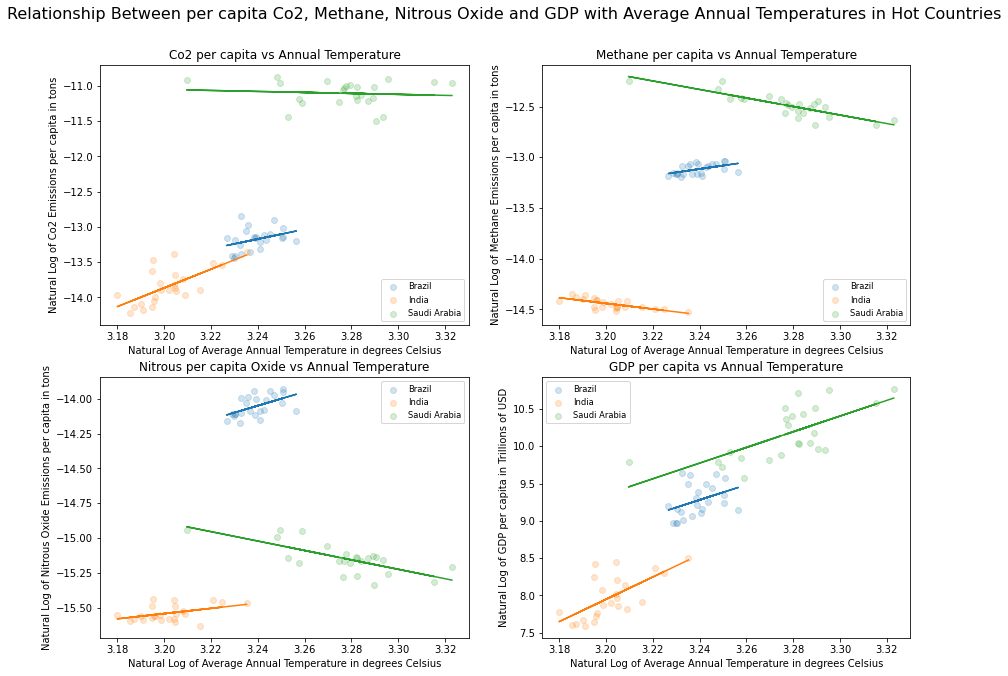

In [127]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Relationship Between per capita Co2, Methane, Nitrous Oxide and GDP with Average Annual Temperatures in Hot Countries",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C1:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['co2']/data_annual[data_annual['Country'] == country]['Population'])
    axis[0, 0].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[0, 0].plot(x, m*x+b)
# For Methane
for country in C1:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['methane']/data_annual[data_annual['Country'] == country]['Population'])
    axis[0, 1].scatter(x, y, label = country, alpha = 0.2) 
    m, b = np.polyfit(x, y, 1)
    axis[0, 1].plot(x, m*x+b)
# For Nitrous Oxide
for country in C1:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['nitrous_oxide']/data_annual[data_annual['Country'] == country]['Population'])
    axis[1, 0].scatter(x, y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[1, 0].plot(x, m*x+b)
# For GDP
for country in C1:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['gdp']/data_annual[data_annual['Country'] == country]['Population'])
    axis[1, 1].scatter(x, y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[1, 1].plot(x, m*x+b)
    
axis[0, 0].set_title('Co2 per capita vs Annual Temperature')
axis[0, 1].set_title('Methane per capita vs Annual Temperature')
axis[1, 0].set_title('Nitrous per capita Oxide vs Annual Temperature')
axis[1, 1].set_title('GDP per capita vs Annual Temperature')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[0, 1].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[1, 0].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[1, 1].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[0, 0].set_ylabel('Natural Log of Co2 Emissions per capita in tons')
axis[0, 1].set_ylabel('Natural Log of Methane Emissions per capita in tons')
axis[1, 0].set_ylabel('Natural Log of Nitrous Oxide Emissions per capita in tons')
axis[1, 1].set_ylabel('Natural Log of GDP per capita in Trillions of USD')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

These scatterplots and regressions lines show how the percentage change in per capita Co2, Methane, Nitrous Oxide and GDP explain the percentage change in average annual temperatures. It's important to note that different countries have wildly different average temperatures, so for the sake of clarity, only the "hot countries" from the temperature change over time graph were included.

Some notable observations include a weak positive correlation between Co2 per capita with annual temperature for China and the lack of correlation between Co2 per capita with average annual temperature in Saudi Arabia. Both of these countries had increasing Co2 per capita and average annual temperatures, but due to Saudi Arabia's more volatile Co2 emissions per capita trend, no relationship can be observed. This disparity suggests that average annual temperatures may not have an explanatory relationship with per capita emissions in countries.

In all countries, GDP per capita has a moderately strong correlation with average annual temperatures. This makes sense because generally GDP grows in every country over time, and climate change is causing global average temperatures in increase (Earth Science Communications Team). It's hard eliminate endogeneity from this regression result because both GDP and average annual temepratures are influenced by a multitude of other factors, and third variables may certainly exist that connect the two variables. Ultimately however, there is some correlation between the two variables which suggests at the very least a relationship between economic expansion and climate change.

In general, nitrous oxide and methane seem to have less explanatory relationships with average annual temperature than the Co2 and GDP variables. This could mean that a country's methane and nitrous oxide emissions have a weaker correlation with their local average annual temperature change than their Co2 emissions and GDP.


## Project 2

### The Message

The evidence is clear that the globe as a whole is warming as a result of human activities and GHG emissions (Earth Science Communications Team). However, it's not clear to what degree a country’s individual actions affect their local temperature. In an attempt to resolve this uncertainty, this paper looks to analyze the relationship between several independent variables such as emissions, GDP and development status with average annual temepratures.

From the figures shown above, it seems as though countries with rapidly expanding economies like China, and Saudi Arabia are growing at the cost of their local environments. However, developed countries, like the United States and the United Kingdom, also rapidly developed in the 19th and 20th century. The question now becomes, do countries who are in transition or developing in the modern era experience larger temperature changes than developed countries who’s bulk GHG emission growth occurred over a hundred years ago?


**Merging with a new dataset**

To test this hypothesis, we will group the countries in this dataset into 3 categories: developed economies, economies in transition and developing economies based on each country’s "basic economic…conditions" (WESP). Note that this dataset was reported on multiple tables in a PDF file so each development status was added manually. We will then create a new variable for the total change in average annual temperatures from 1850-2013 and plot a distribution of total temperature changes for each of the three groups.

In [249]:
#dtc -> data temperature change
dtc = pd.DataFrame(data = {
    'Country': cy['Country'].unique()})
di = {
    'Austria': 'Developed',
    'Russia': 'Developing',
    'Belgium': 'Developed',
    'Denmark': 'Developed',
    'Finland': 'Developed',
    'France': 'Developed',
    'Germany': 'Developed',
    'Greece': 'Developed',
    'Ireland': 'Developed',
    'Italy': 'Developed',
    'Luxembourg': 'Developed',
    'Netherlands': 'Developed',
    'Portugal': 'Developed',
    'Spain': 'Developed',
    'Sweden': 'Developed',
    'United Kingdom': 'Developed',
    'Bulgaria': 'Developed',
    'Croatia': 'Developed',
    'Cyprus': 'Developed',
    'Czech Republic': 'Developed',
    'Estonia': 'Developed',
    'Hungary': 'Developed',
    'Latvia': 'Developed',
    'Lithuania': 'Developed',
    'Malta': 'Developed',
    'Poland': 'Developed',
    'Romania': 'Developed',
    'Slovakia': 'Developed',
    'Slovenia': 'Developed',
    'Iceland': 'Developed', 
    'Norway': 'Developed',
    'Switzerland': 'Developed',
    'Australia': 'Developed',
    'Canada': 'Developed',
    'Japan': 'Developed',
    'New Zealand': 'Developed',
    'United States': 'Developed',
    'Albania': 'Transitioning',
    'Bosnia and Herzegovina': 'Transitioning',
    'Montenegro': 'Transitioning',
    'Serbia': 'Transitioning', 
    'Armenia': 'Transitioning',
    'Azerbaijan': 'Transitioning',
    'Belarus': 'Transitioning', 
    'Georgiaa': 'Transitioning',
    'Kazakhstan': 'Transitioning', 
    'Kyrgyzstan': 'Transitioning', 
    'Republic of Moldova': 'Transitioning', 
    'Tajikistan': 'Transitioning',
    'Turkmenistan': 'Transitioning', 
    'Ukraine': 'Transitioning', 
    'Uzbekistan': 'Transitioning', 
    'Algeria': 'Developing', 
    'Egypt': 'Developing', 
    'Libyab': 'Developing', 
    'Mauritania': 'Developing',
    'Morocco': 'Developing',
    'Sudan': 'Developing', 
    'Tunisia': 'Developing', 
    'Cameroon': 'Developing',
    'Central African Republic': 'Developing',
    'Chad': 'Developing',
    'Congo': 'Developing', 
    'Equatorial Guinea': 'Developing', 
    'Gabon': 'Developing', 
    'Sao Tome and Prinicipe': 'Developing',
    'Burundi': 'Developing', 
    'Comoros': 'Developing', 
    'Democratic Republic of the Congo': 'Developing',
    'Djibouti': 'Developing', 
    'Eritrea': 'Developing', 'Ethiopia': 'Developing',
    'Kenya': 'Developing',
    'Madagascar': 'Developing',
    'Rwanda': 'Developing',
    'Somalia': 'Developing',
    'Uganda': 'Developing',
    'United Republic of Tanzania': 'Developing',
    'Angola': 'Developing',
    'Botswana': 'Developing',
    'Lesotho': 'Developing',
    'Malawi': 'Developing',
    'Mauritius': 'Developing',
    'Mozambique': 'Developing',
    'Namibia': 'Developing',
    'South Africa': 'Developing',
    'Zambia': 'Developing',
    'Zimbabwe': 'Developing',
    'Benin': 'Developing',
    'Burkina Faso': 'Developing',
    'Cabo Verde': 'Developing',
    'Côte d’Ivoire': 'Developing',
    'Gambia': 'Developing',
    'Ghana': 'Developing',
    'Guinea': 'Developing',
    'Guinea-Bissau': 'Developing',
    'Liberia': 'Developing',
    'Mali': 'Developing',
    'Niger': 'Developing',
    'Nigeria': 'Developing',
    'Senegal': 'Developing',
    'Sierra Leone': 'Developing',
    'Togo': 'Developing',
    'Brunei Darussalam': 'Developing',
    'China': 'Developing',
    'Hong Kong': 'Developing',
    'Indonesia': 'Developing',
    'Malaysia': 'Developing',
    'Myanmar': 'Developing',
    'Papua New Guinea': 'Developing',
    'Philippines': 'Developing',
    'Republic of Korea': 'Developing',
    'Singapore': 'Developing',
    'Taiwan Province of China': 'Developing',
    'Thailand': 'Developing',
    'Vietnam': 'Developing',
    'Bangladesh': 'Developing',
    'India': 'Developing',
    'Iran': 'Developing',
    'Nepal': 'Developing',
    'Pakistan': 'Developing',
    'Sri Lanka': 'Developing',
    'Bahrain': 'Developing',
    'Iraq': 'Developing',
    'Israel': 'Developing',
    'Jordan': 'Developing',
    'Kuwait': 'Developing',
    'Lebanon': 'Developing',
    'Oman': 'Developing',
    'Qatar': 'Developing',
    'Saudi Arabia': 'Developing',
    'Syrian Arab Repuplic': 'Developing',
    'Turkey': 'Developing',
    'United Arab Emirates': 'Developing',
    'Yemen': 'Developing',
    'Barbados': 'Developing',
    'Cuba': 'Developing',
    'Dominican Republic': 'Developing',
    'Guyana': 'Developing',
    'Haiti': 'Developing',
    'Jamaica': 'Developing',
    'Trinidad and Tobago': 'Developing',
    'Costa Rica': 'Developing',
    'El Salvador': 'Developing',
    'Guatemala': 'Developing',
    'Honduras': 'Developing',
    'Mexico': 'Developing',
    'Nicaragua': 'Developing',
    'Panama': 'Developing',
    'Argentina': 'Developing',
    'Bolivia': 'Developing',
    'Brazil': 'Developing',
    'Chile': 'Developing',
    'Colombia': 'Developing',
    'Ecuador': 'Developing',
    'Paraguay': 'Developing',
    'Peru': 'Developing',
    'Uruguay': 'Developing',
    'Venezuela': 'Developing',
    }
development_index = pd.DataFrame(data = {'Country': di.keys(),'Development Status': di.values()})
master_data = pd.merge(dtc, development_index, on = 'Country', how = 'inner') 

In [250]:
#Creating Temperature Change Variable
Temp_change = []
#dyt -> data year temp
dyt = annual_temps.groupby(['Country','Year'])
for country in master_data['Country']:
    T1 = list(dyt.get_group((country, 2013))['Avg_Annual_Temp'])[0]
    T2 = list(dyt.get_group((country, 1850))['Avg_Annual_Temp'])[0]
    Temp_change.append(T1 - T2)
master_data['Temperature Change'] = Temp_change

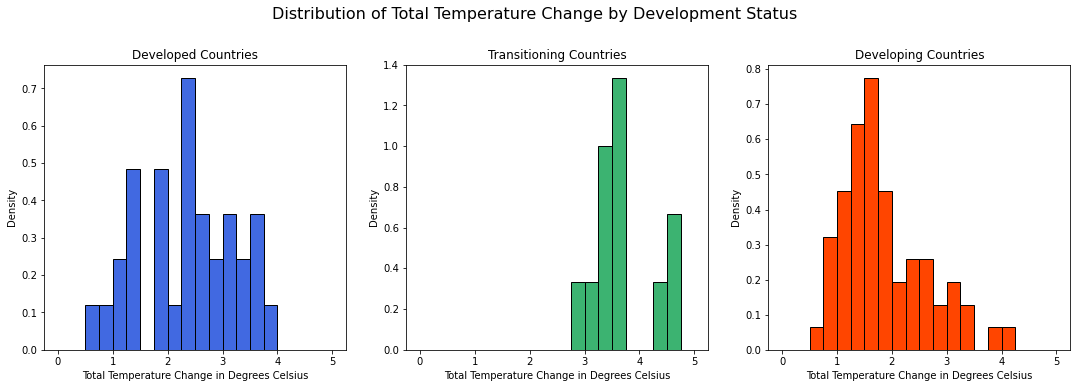

In [251]:
#graphing
development_groups = master_data.groupby('Development Status')
figure, axis = plt.subplots(1, 3)
figure.suptitle("Distribution of Total Temperature Change by Development Status",
                fontsize=16, x = '1.26', y = '1.2') 
axis[0].hist(development_groups.get_group('Developed')['Temperature Change'], bins = 20, density=True, range = [0,5], color = 'royalblue', ec = 'black')
axis[1].hist(development_groups.get_group('Transitioning')['Temperature Change'],  bins = 20, density=True, color = 'mediumseagreen', ec = 'black', range = [0,5])
axis[2].hist(development_groups.get_group('Developing')['Temperature Change'],  bins = 20, density=True, color = 'orangered', ec = 'black', range = [0,5])

axis[0].set_title('Developed Countries')
axis[1].set_title('Transitioning Countries')
axis[2].set_title('Developing Countries')

axis[0].set_xlabel('Total Temperature Change in Degrees Celsius')
axis[1].set_xlabel('Total Temperature Change in Degrees Celsius')
axis[2].set_xlabel('Total Temperature Change in Degrees Celsius')

axis[0].set_ylabel('Density')
axis[1].set_ylabel('Density')
axis[2].set_ylabel('Density')

plt.subplots_adjust(bottom=0.01, right=2.5, top=1)
plt.show()

The figures above illustrate how the development status of countries correlates to the overall temperature change from 1850-2013. From these histograms we can see clearly that transitioning countries faced the highest total temperature change but developed countries had more 2–4-degree temperature changes than currently developing countries. This suggests that countries such as China and Saudi Arabia, who are currently expanding their economies rapidly, may have experienced less total temperature change than developed countries.

### Maps and Interpretations

The maps displayed below will include heat maps of total temperature change and total change in Co2 emissions by country as well as a map of the development status of each country. The goal of these maps is to further explore the relationship between development status and the change in total Co2 emissions from 1990-2013 with the change in average annual temperature in a more recent time-frame from 1990-2013.

In [269]:
#Adding the total change in Co2 Emissions variable to master data
#Creating Temperature Change Variable
Temp_change = []
#dyt -> data year temp
dyt = data_annual.groupby(['Country','Year'])
for country in master_data['Country']:
    T1 = list(dyt.get_group((country, 2013))['Avg_Annual_Temp'])[0]
    T2 = list(dyt.get_group((country, 1990))['Avg_Annual_Temp'])[0]
    Temp_change.append(T1 - T2)
master_data['Temperature Change'] = Temp_change
co2_change = []
for country in master_data['Country']:
    T1 = list(dyt.get_group((country, 2013))['co2'])[0]
    T2 = list(dyt.get_group((country, 1990))['co2'])[0]
    co2_change.append(T1 - T2)
master_data['Co2 Emissions Change'] = co2_change
map_data = master_data.copy()

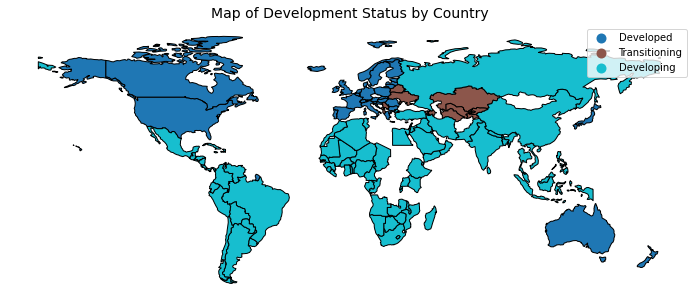

In [262]:
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"name": "Country"})
world['Country'] = world['Country'].replace(['United States of America'], 'United States')
geo_data = pd.merge(world, map_data, on = 'Country', how='inner')
fig, gax = plt.subplots(figsize = (20,5))
geo_data.plot(
    ax=gax, edgecolor='black', column='Development Status', categorical=True, legend = True, categories = ['Developed', 'Transitioning', 'Developing']
)
plt.title("Map of Development Status by Country", fontsize= 14)
plt.axis('off')
plt.show()

The map above highlights each country in the dataset by their development status to make interpretations easier for the reader when comparing the heat maps plotted below.

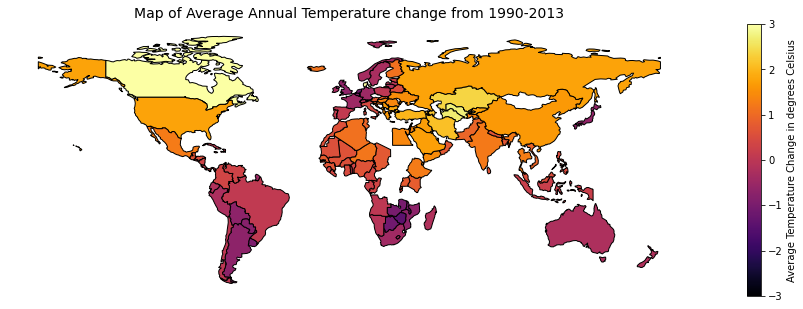

In [263]:
fig, gax = plt.subplots(figsize = (20,5))
geo_data.plot(
    ax=gax, edgecolor='black', column='Temperature Change', legend=True, cmap='inferno',
    vmin=-3, vmax=3, legend_kwds={'label': "Average Temperature Change in degrees Celsius",'shrink': 1}
)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=10)
plt.title("Map of Average Annual Temperature change from 1990-2013", fontsize= 14)
plt.axis('off')
plt.show()

This map shows the total average annual temperature change from 1990-2013 for all the countries in the dataset. Note that some countries are missing from the dataset and a total of 135 countries are included in these data. Disregarding Canada as an outlier, we can see that countries such as China, India, and much of the Middle East and Asia have recorded average annual temperatures about 2 degrees higher in 2013 than in 1990. This indicates that that countries in transition or developing countries generally have higher average annual temperature increases than developed countries in the time frame of 1990-2013. Tajikistan, for example, is a country in transition that recorded an average annual temperature increase of closer to 3 degrees Celsius. Conversely, developed countries in western Europe recorded neutral or decreasing temperatures from 1990-2013.

The reason that developing nations seem to have higher average annual temperature increases compared to developed nations is because the timescale in this figure is 1990-2013. In more recent years, developing nations have been higher emitters than developed nations, so if GHG emissions is linked to average annual temperature then we should expect this outcome.


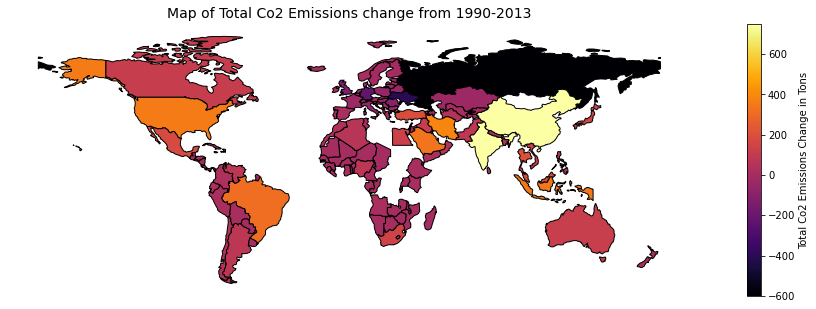

In [270]:
fig, gax = plt.subplots(figsize = (20,5))
geo_data.plot(
    ax=gax, edgecolor='black', column='Co2 Emissions Change', legend=True, cmap='inferno',
    vmin=-600, vmax=750, legend_kwds={'label': "Total Co2 Emissions Change in Tons",'shrink': 1}
)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=10)
plt.title("Map of Total Co2 Emissions change from 1990-2013", fontsize= 14)
plt.axis('off')
plt.show()

This final map shows the change in total Co2 emissions from 1990-2013 for countries in this dataset. A few outliers like Russia, China and India are worth discussing. China and India recorded an increase in Co2 Emissions in the thousands of tons when the mean for Co2 emissions change was approximately an increase of 82 tons. Conversely, Russia recorded a decrease in Co2 emissions of approximately 900 tons. In this case, the large decrease in Co2 Emissions isn't an indication that Russia is necessarily reducing emissions consistently, but a result of sample variance. Russia emits tens of thousands of tons of Co2, so a decrease of 900 tons in 2013 compared to 1990 could be mitigated by an increase of a few thousand tons in 2014. 

Comparing Co2 emissions to development status, we can observe a weaker relationship between development status and total Co2 emission change than development status and average annual temperature change. The expectation based on the hypothesis was that the change in overall Co2 emissions and average annual temperature would have a negative correlation with development status. This means that the more developed a country becomes, the less their average annual temperature would change and the less Co2 they would emit. Based on the maps above, it's possible that average temperature has a weak negative correlation with development status, but the correlation between Co2 emission change and development status is much weaker than average annual temperature change.

## Project 3

### Potential Data to Scrape

So far, the data in this study suggests that countries who emit lots of greenhouse gases and have experienced rapid GDP growth, are more likely to experience higher annual average temperature changes. So far in this study, the hypothesis was that countries with high levels of industrialization would experience higher annual average temperatures, and to test this, Co2 emissions and GDP have been used as proxies for a country’s overall industry level. To gain a better understanding of how a country’s industrialization level impacts their local average annual temperature changes, it is useful to add data their manufacturing output.

These data can be scraped from the Brookings Global manufacturing scorecard 2018 (West & Lansang, 2022) and will be merged with the annual dataset so that the countries and years in the new dataset are added to the annual average temperature dataset without deleting unmatched observations. The table from Brookings that will be merged contains data on global manufacturing output rankings for 19 countries from 1970 - 2015 and will enable research to be conducted on the relationship between a countries manufacturing output ranking and their average temperatures.


### Potential Challenges

The data on manufacturing output ranking by country by year is somewhat similar in shape to the annual dataset in this paper. The only challenge will be to combine the country and year from the new dataset in columns rather than having country in the top row. Also, the new dataset contains substantially less observations, so merging the two datasets in such a way that no data is dropped from the original dataset and visualization is possible without being skewed by missing data may pose a challenge.

### Scraping Data from a Website

In [129]:
import requests
from bs4 import BeautifulSoup
url = "https://www.brookings.edu/research/global-manufacturing-scorecard-how-the-us-compares-to-18-other-nations/"
response = requests.get(url)
soup = BeautifulSoup(response.content)

In [130]:
data_table = soup.find_all('table')[3]
all_values = data_table.find_all('tr')
rankings = pd.DataFrame(columns = ['Year', 
                                   'United States', 'Russia', 'Japan', 'Germany', 'China',
                                  'United Kingdom', 'France', 'Italy', 'Canada', 'Spain']) # Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values[1:-1]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    Year = values[0].text
    US = values[1].text
    Russia = values[2].text
    Japan = values[3].text
    Germany = values[4].text
    China = values[5].text
    UK = values[6].text
    France = values[7].text
    Italy = values[8].text
    Canada = values[9].text
    Spain = values[10].text
    
    rankings.loc[ix] = [Year, US, Russia, Japan, Germany, China, UK, France, Italy, Canada, Spain] # Store it in the dataframe as a row
    ix += 1

In [131]:
data_table1 = soup.find_all('table')[4]
all_values1 = data_table1.find_all('tr')
rankings1 = pd.DataFrame(columns = ['Year', 
                                   'Taiwan', 'India', 'Brazil', 'Mexico', 'Switzerland',
                                  'Turkey', 'South Korea', 'Thailand', 'Indonesia']) # Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values1[1:-1]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    Year = values[0].text
    Taiwan = values[1].text
    India = values[2].text
    Brazil = values[3].text
    Mexico = values[4].text
    Switzerland = values[5].text
    Turkey = values[6].text
    SouthK = values[7].text
    Thailand = values[8].text
    Indonesia = values[9].text
    
    rankings1.loc[ix] = [Year, Taiwan, India, Brazil, Mexico, Switzerland, Turkey, SouthK, Thailand, Indonesia] # Store it in the dataframe as a row
    ix += 1

### Merging the Scraped Dataset

In [132]:
#putting scraped data in mergeable format
new_data = pd.merge(rankings, rankings1, on='Year')
countries = pd.DataFrame({'Country': new_data.columns[1::]})
yrs = [1970,1980,1990,2000, 2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
sd = {}
c = []
y = []
for country in countries['Country']:
    for i in range(15):
        c.append(country)
        y.append(yrs[i])
ranking = []
for column in new_data.columns[1::]:
    for r in list(new_data[column]):
        ranking.append(int(r))
        
scraped_data = pd.DataFrame({'Year': y, 'Country': c, 'Ranking': ranking})


In [133]:
#Merging with annual data
new_master = pd.merge(data_annual, scraped_data, on = ['Year', 'Country'], how='left')

### Visualizing the Scraped Dataset

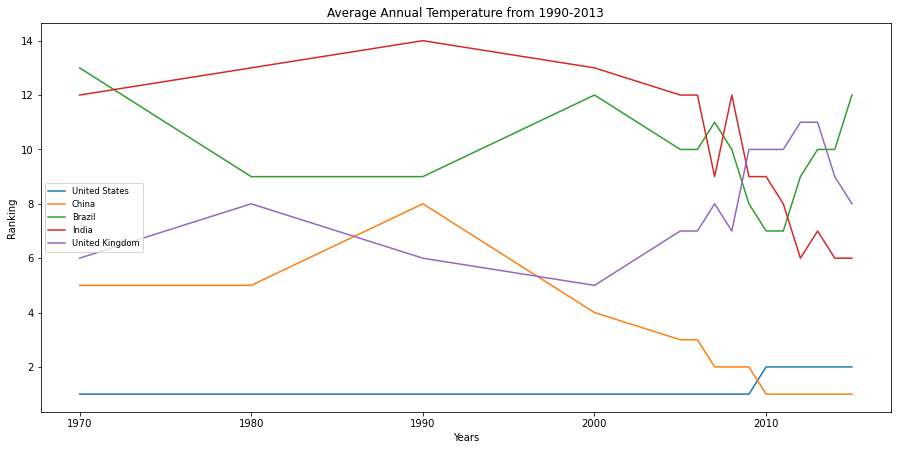

In [232]:
#Countries
C = ['United States', 'China', 'Brazil', 'India', 'United Kingdom']
fig, gax = plt.subplots(figsize = (8,6))
for country in C:
    plt.plot(scraped_data['Year'].unique(),scraped_data[scraped_data['Country'] == country]['Ranking'].fillna(method ='ffill'), label = country)
# set axis lables
plt.xlabel("Years")
plt.ylabel("Ranking")
# set chart title
plt.title("Average Annual Temperature from 1990-2013")
plt.legend(loc = 'best', fontsize = 'small')
plt.subplots_adjust(bottom=0.1, right=1.6, top=1)
plt.show()

Saudi Arabia, which was featured in other key graphs, wasn't included in the scraped data set. For this reason, this graph shows how these 5 countries have changed in terms of their manufacturing output ranking over a 45 year period. Note that the smoothness in the earlier years displayed in this graph are because observations in the data occur once every 10 years from 1970-2000 and once a year from 2005-2015. 

We can see from this graph that China has quickly become the nation with the world's highest manufacturing output in 2010, surpassing the United States. India has also steadily climbed up the rankings while the United Kingdom and Brazil have somewhat reduced their manufacturing output compared to the leaders. These findings are consistent with earlier data showing how China and India are quickly growing economies in developing nations that are massively increasing their carbon emissions through manufacturing output increase. If manufacturing output is linked to carbon emissions, GDP and average annual temperature, we should find a negative correlation between these variables and manufacturing output ranking when running a regression.

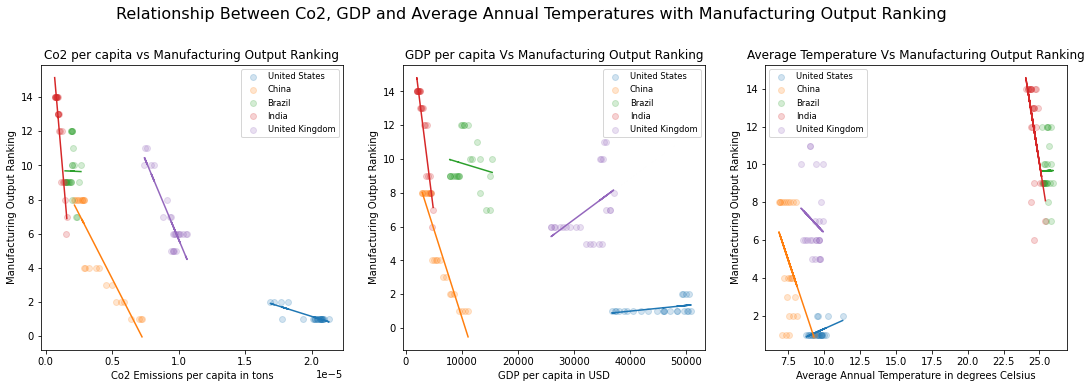

In [238]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)
figure.suptitle("Relationship Between Co2, GDP and Average Annual Temperatures with Manufacturing Output Ranking",
                fontsize=16, x = '1.26', y = '1.2') 
# For Co2
for country in C:
    x = (new_master[new_master['Country'] == country]['co2']/new_master[data_annual['Country'] == country]['Population'])
    y = (new_master[new_master['Country'] == country]['Ranking'].fillna(method ='ffill'))
    axis[0].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[0].plot(x, m*x+b)
# For GDP
for country in C:
    x = (new_master[new_master['Country'] == country]['gdp']/new_master[data_annual['Country'] == country]['Population'])
    y = (new_master[new_master['Country'] == country]['Ranking'].fillna(method ='ffill'))
    axis[1].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[1].plot(x, m*x+b)
# For Average Temperature
for country in C:
    x = (new_master[new_master['Country'] == country]['Avg_Annual_Temp'])
    y = (new_master[new_master['Country'] == country]['Ranking'].fillna(method ='ffill'))
    axis[2].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[2].plot(x, m*x+b)

    
axis[0].set_title('Co2 per capita vs Manufacturing Output Ranking')
axis[1].set_title('GDP per capita Vs Manufacturing Output Ranking')
axis[2].set_title('Average Temperature Vs Manufacturing Output Ranking')

axis[0].legend(loc = 'best', fontsize = 'small')
axis[1].legend(loc = 'best', fontsize = 'small')
axis[2].legend(loc = 'best', fontsize = 'small')

axis[0].set_xlabel('Co2 Emissions per capita in tons')
axis[1].set_xlabel('GDP per capita in USD')
axis[2].set_xlabel('Average Annual Temperature in degrees Celsius')

axis[0].set_ylabel('Manufacturing Output Ranking')
axis[1].set_ylabel('Manufacturing Output Ranking')
axis[2].set_ylabel('Manufacturing Output Ranking')

plt.subplots_adjust(bottom=0.01, right=2.5, top=1)
plt.show()

The three graphs above demonstrate the relationship between the new variable, manufacturing output ranking, with three important variables from earlier in the study, Co2, GDP and Average Annual Temperature.

The relationship between Co2 per capita and GDP per capita with manufacturing output ranking is a relatively strong negative correlation in China and India. In the case of Co2 per capita, even the United Kingdom and the United States have a moderate negative correlation with manufacturing output ranking. This supports the hypothesis that Co2 emissions are strongly tied to manufacturing output, meaning that a country’s industry level has a direct impact on the GHG emissions.

When it comes to average temperature, no meaningful relationship between manufacturing output ranking and average temperature can be observed in any of the countries plotted. This likely means that a countries local average annual temperature.

Overall, this figure indicates that both Co2 primarily, and GDP in some cases, are good proxies for manufacturing output because of the strength of their correlations with manufacturing output ranking. This relationship indicates that GDP and Co2 are good proxies for a country’s level of industrialization and strengthens the interpretations derived from studying these variables in the context of climate change.


### Adding a New Dataset

One factor that could affect local average annual temperatures that has not yet been discussed is local air pollution. Do countries whose GHG emissions have risen also have rising air pollution? In other words, does some of the GHGs a country emits stay concentrated locally and have a direct impact on the increase in average annual temepratures? Pollution in the dataset added at this point is PM2.5 air pollution in mean annual exposure (micrograms per cubic meter)(Ritchie & Roser, Outdoor Air Pollution 2019).

In [271]:
polution_url = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\PM25-air-pollution.csv"
pol = pd.read_csv(polution_url).drop(labels = 'Code', axis = 1).rename(columns = {'Entity': 'Country', 'Polution': 'Pollution'})
pol_data = data_annual.merge(pol, on = ['Country', 'Year'], how ='left')

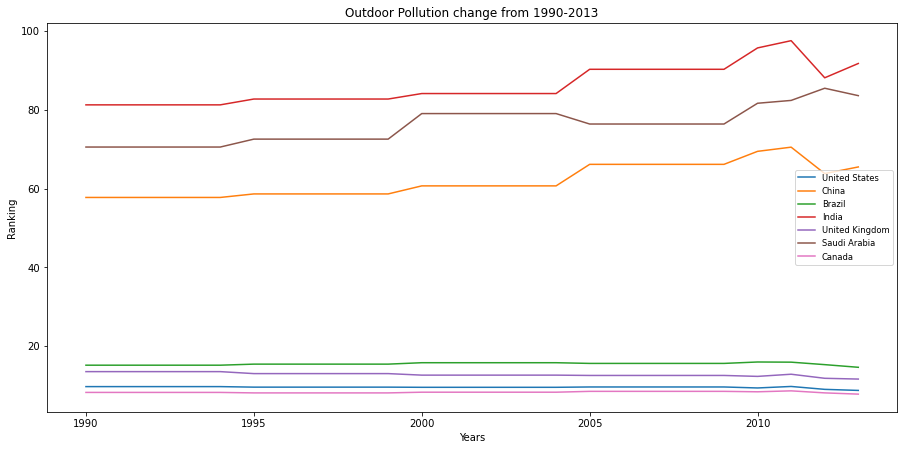

In [274]:
#Countries
C = ['United States', 'China', 'Brazil', 'India', 'United Kingdom', 'Saudi Arabia', 'Canada']
fig, gax = plt.subplots(figsize = (8,6))
for country in C:
    plt.plot(pol_data['Year'].unique(),pol_data[pol_data['Country'] == country]['Pollution'].fillna(method ='ffill'), label = country)
# set axis lables
plt.xlabel("Years")
plt.ylabel("Ranking")
# set chart title
plt.title("Outdoor Pollution change from 1990-2013")
plt.legend(loc = 'best', fontsize = 'small')
plt.subplots_adjust(bottom=0.1, right=1.6, top=1)
plt.show()

From this figure we can observe that the 7 representative countries get broken into two distinct groups, high outdoor air polution and low outdoor air pollution. Of those in the high air polution countries are mostly developing countries, while in the low air pollution group most of the countries are highly developed. This may be because the data used to form this figure is constrained to 1990 as the earliest point in the time-series, and developed countries may have seen substantially worse outdoor air pollution when they were more rapidly expaniding their economies (the UK would certianly be near the top of this figure in the 1950s for example(History)).

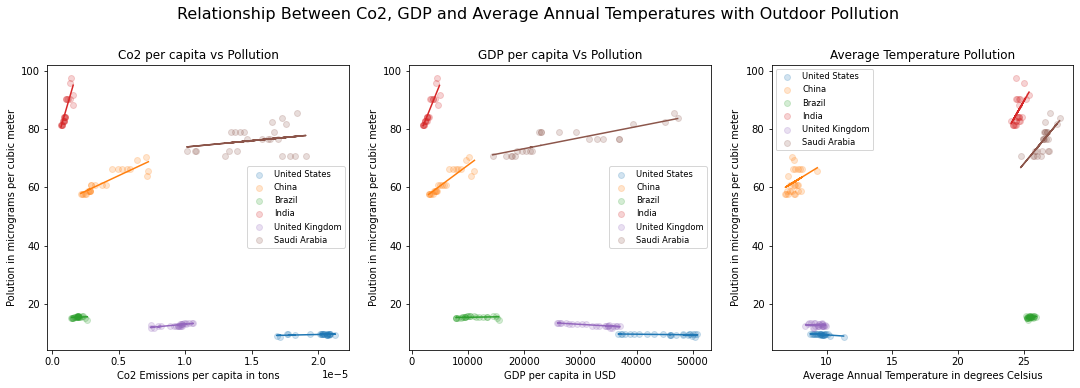

In [275]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)
figure.suptitle("Relationship Between Co2, GDP and Average Annual Temperatures with Outdoor Pollution",
                fontsize=16, x = '1.26', y = '1.2') 
C = ['United States', 'China', 'Brazil', 'India', 'United Kingdom', 'Saudi Arabia']
# For Co2
for country in C:
    x = (pol_data[pol_data['Country'] == country]['co2']/new_master[data_annual['Country'] == country]['Population'])
    y = (pol_data[pol_data['Country'] == country]['Pollution'].fillna(method ='ffill'))
    axis[0].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[0].plot(x, m*x+b)
# For GDP
for country in C:
    x = (pol_data[pol_data['Country'] == country]['gdp']/new_master[data_annual['Country'] == country]['Population'])
    y = (pol_data[pol_data['Country'] == country]['Pollution'].fillna(method ='ffill'))
    axis[1].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[1].plot(x, m*x+b)
# For Average Temperature
for country in C:
    x = (pol_data[pol_data['Country'] == country]['Avg_Annual_Temp'])
    y = (pol_data[pol_data['Country'] == country]['Pollution'].fillna(method ='ffill'))
    axis[2].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[2].plot(x, m*x+b)

    
axis[0].set_title('Co2 per capita vs Pollution')
axis[1].set_title('GDP per capita Vs Pollution')
axis[2].set_title('Average Temperature Pollution')

axis[0].legend(loc = 'best', fontsize = 'small')
axis[1].legend(loc = 'best', fontsize = 'small')
axis[2].legend(loc = 'best', fontsize = 'small')

axis[0].set_xlabel('Co2 Emissions per capita in tons')
axis[1].set_xlabel('GDP per capita in USD')
axis[2].set_xlabel('Average Annual Temperature in degrees Celsius')

axis[0].set_ylabel('Polution in micrograms per cubic meter')
axis[1].set_ylabel('Polution in micrograms per cubic meter')
axis[2].set_ylabel('Polution in micrograms per cubic meter')

plt.subplots_adjust(bottom=0.01, right=2.5, top=1)
plt.show()

This figure shows that countries in the "high outdoor pollution" group have moderate to strong correlations between outdoor pollution with Co2 per capita, GDP per capita and Average Annual Temepratures. We can infer from these data that outdoor pollution is only correlated with Co2, GDP and Average Temperatures in cases where fine particle matter (PM2.5) exceeds around 50 micrograms per cubic meter. In cases where fine particle matter doesn't exceed this threshold, no explanatory relationship can be found between pollution and Co2, GDP or average temperature.

The relationship between fine particle matter and average annual temperature is the strongest of any of the other variables regressed on average annual temperature. Seeing as Co2 emissions per capita also has a moderate to strong relationship with outdoor pollution, it may be the case that a country’s local emissions directly impact their local average temepratures by polluting the air in the country. The strength of the relationship between Co2 emissions and Average annual temepratures may be weaker than fine particle matter because of spillover, where a country’s emissions impact their neighbors outdoor pollution level. If spillover occurs, then a country’s own emissions may not tell the whole story of pollution, thereby decreasing the correlation between Co2 Emissions and Average Annual Temperature.


### Conclusion

This study investigated the relationship between emissions, GDP, development status, pollution and manufacturing output ranking on a country's local annual average temperatures. The goal was to answer the question: "What variables have an effect on a country’s local temperature". In general, average annual temepratures increase for all countries over time, so variables that had a positive trend were more high correlated with average annual temperature. Such variables include GDP, GHG emissions, Pollution, GDP per capita, and in some instances, GHG emissions per capita.

The variable for manufacturing output ranking had strong relationships with Co2 per capita and GDP per capita in some instances, demonstrating that Co2 and GDP can be good proxies for a country’s level of industrialization. GDP and GDP per capita may have a strong relationship with average annual temepratures because GDP generally rises over time for most countries, and in all countries average annual temepratures are steadily increasing. This does not mean that the higher the GDP, the higher the local average annual temperature in general, because several third variables may exist and create an endogeneity bias.

The correlation between Co2 per capita, the most impactful of all GHGs studied, and average annual temperature is moderately strong. This may be because a countries local emissions translate in some part to the level of fine particle matter outdoors, which in turn has a strong relationship with average annual temepratures.

Finally, a countries development status suggests that countries in transition face the highest total temperature change from 1850-2013, and that developed countries generally got warmer than currently developing countries. If the level of local GHG emissions impacts the change in local temepratures, these findings make sense because in this timescale, developed countries like the US and the UK were the biggest polluters because of their emissions during the 19th and 20th centuries (Ritchie, Who has contributed most to Global CO2 emissions?). In a more recent timescale (1990-2013), developing countries seem to have higher average temperature change. This is because developing nations are currently acting as large Co2 emitters while developed nations can enjoy the results of having been large emitters in years prior to this timescale.


## Bibliography

Christopher L. Weber a, et al. “The Contribution of Chinese Exports to Climate Change.” Energy Policy, Elsevier, 21 July 2008, https://www.sciencedirect.com/science/article/pii/S0301421508002905. 

Earth Science Communications Team at  NASA's Jet Propulsion Laboratory. “The Causes of Climate Change.” NASA, NASA, 21 Feb.      2023, https://climate.nasa.gov/causes/. 

Earth, Berkeley. “Climate Change: Earth Surface Temperature Data.” Kaggle, 1 May 2017,                                         https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data. 

Ritchie, Hannah, et al. “CO2 Emissions.” Our World in Data, 11 May 2020, https://ourworldindata.org/co2-emissions. 

Rosa, Eugene A., and Thomas Dietz. “Human Drivers of National Greenhouse-Gas Emissions.” Nature News, Nature Publishing Group,  10 June 2012, https://www.nature.com/articles/nclimate1506. 

Knight, Kyle W., and Juliet B. Schor. “Economic Growth and Climate Change: A Cross-National Analysis of Territorial and          Consumption-Based Carbon Emissions in High-Income Countries.” MDPI, Multidisciplinary Digital Publishing Institute, 10 June     2014, https://www.mdpi.com/2071-1050/6/6/3722. 

Jorgenson, Dale W., et al. “Raising the Speed Limit: U.S. Economic Growth in the Information Age.” Brookings Papers on Economic  Activity, vol. 2000, no. 1, 2000, pp. 125–235. JSTOR, http://www.jstor.org/stable/2667350. Accessed 25 Feb. 2023.

WESP. “Country Classification - United Nations.” World Economic Situation - United Nations, 2020, https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf. 

Environmental Protection Agency. (n.d.). Sources of Greenhouse Gas Emissions. EPA. Retrieved March 14, 2023, from https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions 

West, D. M., &amp; Lansang, C. (2022, March 9). Global Manufacturing Scorecard: How the US compares to 18 other nations. Brookings. Retrieved March 14, 2023, from https://www.brookings.edu/research/global-manufacturing-scorecard-how-the-us-compares-to-18-other-nations/ 

Ritchie, H. (2019, October 4). Where in the world do people emit the most CO2? Our World in Data. Retrieved March 23, 2023, from https://ourworldindata.org/per-capita-co2 

Ritchie, H., &amp; Roser, M. (2019, November 12). Outdoor Air Pollution. Our World in Data. Retrieved March 23, 2023, from https://ourworldindata.org/outdoor-air-pollution 

History. (n.d.). The Great Smog of 1952 - history. Retrieved March 23, 2023, from https://www.history.com/news/the-killer-fog-that-blanketed-london-60-years-ago 

Ritchie, H. (2019, October 1). Who has contributed most to Global CO2 emissions? Our World in Data. Retrieved March 24, 2023, from https://ourworldindata.org/contributed-most-global-co2 